In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 산술평균
x = [1,2,3,4,5]
np.mean(x)

3.0

In [5]:
np.array(x).mean()
pd.Series(x).mean()

3.0

3.000

In [9]:
# 교재 31쪽 예제
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [10]:
df.shape

(50, 2)

In [14]:
# 영어 점수의 산술평균 계산(numpy)
np.mean(df['english'])

58.380

In [13]:
# 영어 점수의 산술평균 계산(dataframe)
df['english'].mean()

58.380

In [15]:
# 영어 점수의 산술평균 계산(scipy)
sp.mean(df['english'])

C:\Users\0528x\AppData\Local\Temp/ipykernel_7844/2338001374.py:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(df['english'])


58.380

In [16]:
# 성장률의 기하평균 구하기
data = [200,800,300]
np.mean(data) # 산술평균으로 구하는 것은 부적절함

433.3333333333333

In [17]:
# 곱하기를 해서 나오는 값에 대한 평균은 산술평균 보다는 기하평균 사용
# 기하평균
math.prod(data)**(1/len(data))

363.424

In [18]:
# 기하평균 계산(scipy.stats.gmean(a [, axis, dtype, weights]) )
gmean(data)

363.42411856642775

In [20]:
# 조화평균
data = np.array([80,120])
1/data
len(data)/np.sum(1/data)

array([0.013, 0.008])

95.99999999999999

In [21]:
# 조화평균(scipy.stats.hmean(a [, axis, dtype]))
hmean(data)

95.99999999999999

In [23]:
# 가중평균
np.average(np.arange(1, 5))
np.average(np.arange(1, 11), weights=np.arange(10, 0, -1))

2.5

4.0

In [24]:
# 산술평균
np.mean(np.arange(1, 11))

5.5

In [25]:
# 예제 데이터
scores = np.array(df['english'])
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [26]:
# 순서 통계량
sorted_scores = np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [28]:
# median(중앙값) 계산 개념 이해
n = len(sorted_scores)
if n%2 == 0:
    x1 = sorted_scores[n//2-1]
    x2 = sorted_scores[n//2]
    median = (x1+x2)/2
else:
    median = sorted_scores/2
    
median

57.5

In [29]:
# numpy의 median()함수
np.median(scores)

57.5

In [30]:
# pandas.DataFrame의 median() 함수
df['english'].median()

57.500

In [31]:
# 절사평균
np.random.seed(3)
income = np.random.normal(2000000, 500000, 100)
# normal : 정규분포에서 데이터 가져옴
# 평균과 표준편차를 넣으면 이 분포로 데이터를 만들어 줌
# np.random.normal(평균, 표준편차, 만들 데이터 개수)
income[:10] # 10개만 보기

array([2894314.237, 2218254.925, 2048248.734, 1068253.648, 1861305.899,
       1822620.51 , 1958629.259, 1686499.662, 1978090.916, 1761390.985])

In [32]:
# 평균 소득
np.mean(income)

1945681.4627969689

In [34]:
# 소득이 10억인 사람 추가하기
income = np.append(income, 10**9)

In [35]:
# 평균 다시 구하기
np.mean(income)

11711453.296859775

In [36]:
# 중앙값 구하기 (-> 산술평균보다 좋은 이유! 이상값에 강함)
np.median(income)

1910517.9894137066

In [37]:
# 절사평균 scipy.stats.trim_mean(a, proportiontocut[, axis])
# proportiontocut : 양쪽 꼬리에서 잘라낼 값. 
#                   아래의 식에서는 양쪽 20%에 해당하는 값을 뻄
trim_mean(income, 0.2)

1934158.764258797

In [47]:
# 최빈값(mode; 정상, 봉우리)
np.random.seed(3)
data = np.random.choice(['A','B','C'], 1000)
# choice : 범주형 데이터에서 선택할 수 있게 해주는 함수
# data는 A, B, C라는 요소로만 이루어진 데이터
data[:10]
len(data)

array(['C', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'C', 'B'], dtype='<U1')

1000

In [48]:
# 최빈값 계산 scipy.stats.mode(a [,axis, nam_policy]) 이용
mode(data)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([350]))

In [49]:
# 최빈값 : A, B, C요소 중에 가장 빈도가 높은 데이터 구하기
mode(data).mode

array(['A'], dtype='<U1')

In [50]:
# 최빈값의 빈도 : A, B, C요소 중에 가장 빈도가 높은 데이터의 개수 구하기
mode(data).count

array([350])

In [51]:
# pd.Series의 value_counts()를 이용하여 나온 첫번째 결과가 최빈값
pd.Series(data).value_counts()

A    350
B    328
C    322
dtype: int64

In [52]:
# 최빈값 구하기
pd.Series(data).value_counts().index[0]
# 최빈값의 빈도 구하기 
pd.Series(data).value_counts()[0]

'A'

350

In [54]:
np.random.seed(123)
data = np.random.normal(100,20,size=1000)
data[:10]

array([ 78.287, 119.947, 105.66 ,  69.874,  88.428, 133.029,  51.466,
        91.422, 125.319,  82.665])

In [55]:
# 정렬된 데이터의 0번째 값 = 최솟값, 마지막 번째 값 = 최댓값
sorted(data)[0], sorted(data)[-1]

(35.37889984161376, 171.43158436052622)

In [56]:
# 최솟값, 최댓값
np.min(data), np.max(data)

(35.37889984161376, 171.43158436052622)

In [57]:
# 사분위수 numpy.quantile?percentile(a, q[, axis, out, ...]) 이용

In [58]:
# 제1사분위수(하사분위수, Q1)
np.percentile(data,25)

86.30886819268538

In [59]:
# 제2사분위수(중위수, Q2)
np.percentile(data, 50)

99.17628889574436

In [60]:
# 제3사분위수(상사분위수, Q3)
np.percentile(data, 75)

113.37731495435875

In [61]:
# 5가 통계량 : 최솟값, 제1사분위수, 중위수. 제3사분위수, 최댓값
# 상자-수염그림(boxplot)

{'whiskers': [<matplotlib.lines.Line2D at 0x22a3c2ad490>,
 'caps': [<matplotlib.lines.Line2D at 0x22a3c2adaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a3c2ad040>],
 'medians': [<matplotlib.lines.Line2D at 0x22a3c2bc250>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a3c2bc5e0>],
 'means': []}

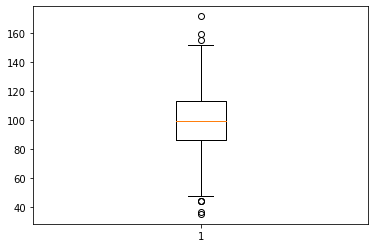

In [62]:
import matplotlib.pyplot as plt

plt.boxplot(data)

In [63]:
# 기술통계량 계산 함수 : describe()
describe(data)
describe(df['english'])

DescribeResult(nobs=1000, minmax=(35.37889984161376, 171.43158436052622), mean=99.20871727838417, variance=401.03130940853094, skewness=-0.029040113501245676, kurtosis=-0.02543852877769215)

DescribeResult(nobs=50, minmax=(37, 79), mean=58.38, variance=96.03632653061224, skewness=-0.31679325324962426, kurtosis=-0.38870454364589113)

In [66]:
df['english'].describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
Name: english, dtype: float64

In [ ]:
describe(df['english'], ddof=0) # ddof= 0 : 모집단 데이터에 대한 기술통계량